# ___K-Means Clustering in Python___

### I'm Harry, here's how i implement K-Means clustering algorithm 
#### This is a website that i have refered
- Article https://mubaris.com/2017-10-01/kmeans-clustering-in-python
- Codes: https://github.com/mubaris/friendly-fortnight
#### So let's get started! Yolo

<br><br><center><h1 style="font-size:3em;color:#2467C0">K-Means Clustering

</h1></center>
<br>
<table>
<col width="600">
<col width="500">
<tr>
<td><img src="https://i.imgur.com/S65Sk9c.jpg" align="middle" style="width:660;height:400px;"/></td>
<td>
<strong>
Clustering is a type of Unsupervised learning.
</strong>  This is very often used when you don’t have labeled data. K-Means Clustering is one of the popular clustering algorithm.<strong> The goal of this algorithm is to find groups(clusters) in the given data</strong>. In this post we will implement K-Means algorithm using Python from scratch.
<br>

</td>
</tr>
</table>

## Use Cases

### K-Means is widely used for many applications.

- Image Segmentation
- Clustering Gene Segementation Data
- News Article Clustering
- Clustering Languages
- Species Clustering
- Anomaly Detection

## Algorithm

### Our algorithm works as follows, assuming we have inputs \(x_1, x_2, x_3, …, x_n\) and value of K

- Step 1 - Pick K random points as cluster centers called centroids.
- Step 2 - Assign each \(x_i\) to nearest cluster by calculating its distance to each centroid.
- Step 3 - Find new cluster center by taking the average of the assigned points.
- Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

<td><img src="https://i.imgur.com/k4XcapI.gif" align="middle" style="width:550px;height:360px;"/></td>



<br><br><center><h1 style="font-size:3em;color:#2467C0">Choosing the Value of K
</h1></center>
<br>
<table>
<col width="600">
<col width="500">
<tr>
<td><img src="https://i.imgur.com/k3o6NxK.jpg" align="middle" style="width:660;height:400px;"/></td>
<td>
<strong>
Choosing the Value of K
</strong>
We often know the value of K. In that case we use the value of K. Else we use the Elbow Method.
. We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point as shown in the figure.


<br>

</td>
</tr>
</table>

## HOW HARRY CHOOSE THE FACTOR K? 

### Let's find out what exactly does k influence in the algorithm?
<td><img src="https://www.analyticsvidhya.com/wp-content/uploads/2014/10/K-judgement.png" align="middle" style="width:660;height:400px;"/></td>

<td><img src="https://www.analyticsvidhya.com/blog/wp-content/uploads/2014/10/K-judgement2.png
" align="middle" /></td>

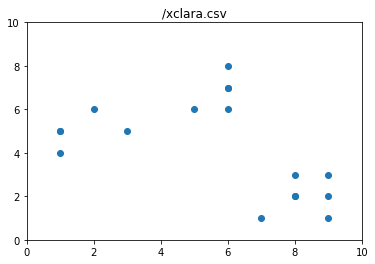

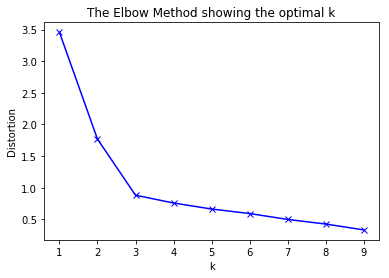

In [5]:
 # clustering dataset
# determine k using elbow method
 
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 
 
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
 
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('/xclara.csv')
plt.scatter(x1, x2)
plt.show()
 
# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
 
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Implementation using Python

#### The dataset we are gonna use has 3000 entries with 3 clusters. So we already know the value of K.



In [9]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(16,9) #Set the current rc params. Group is the grouping for the rc, e.g., for lines.linewidth the group is lines, for axes.facecolor, the group is axes, and so on. Group may also be a list or tuple of group names, e.g., (xtick, ytick). kwargs is a dictionary attribute name/value pairs, e.g.,:
plt.style.use('ggplot')

### Importing the dataset


In [12]:
data= pd.read_csv('k-means/xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


### Getting the values and plotting it

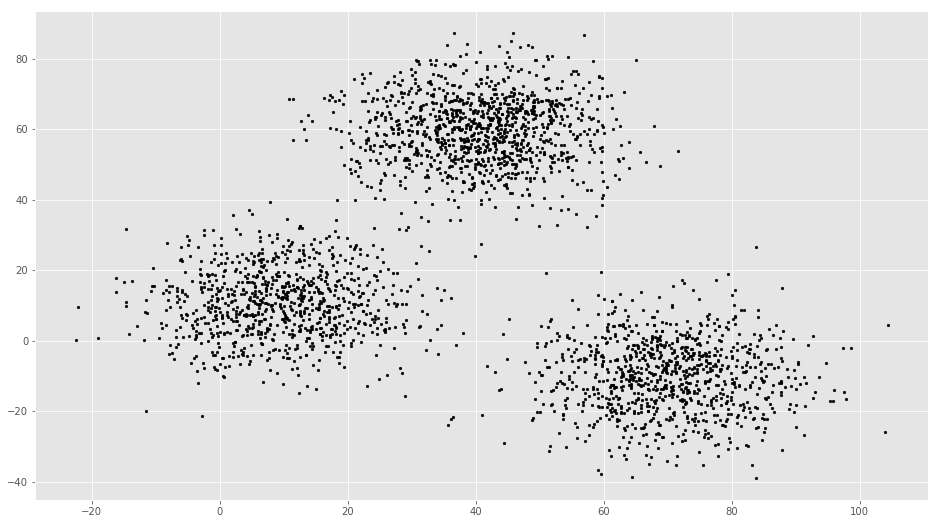

In [18]:
f1 = data["V1"].values
f2 = data["V2"].values
X = np.array(list(zip(f1,f2)))  
plt.scatter(f1,f2,c="black",s=7) # ‘c’	‘color’ 

### Euclidean Distance Caculator

In [15]:
def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [16]:
### Number of clusters
k=3
### X coordinates of random centroids (centroids : Pick K random points as cluster centers called centroids.)
C_x = np.random.randint(0,np.max(X)-20,size=k)
### Y coordinates of random centroids 
C_y = np.random.randint(0,np.max(X)-20,size=k)
C = np.array(list(zip(C_x,C_y)),dtype=np.float32)
print (C)

[[ 30.   6.]
 [ 22.  29.]
 [ 69.   2.]]


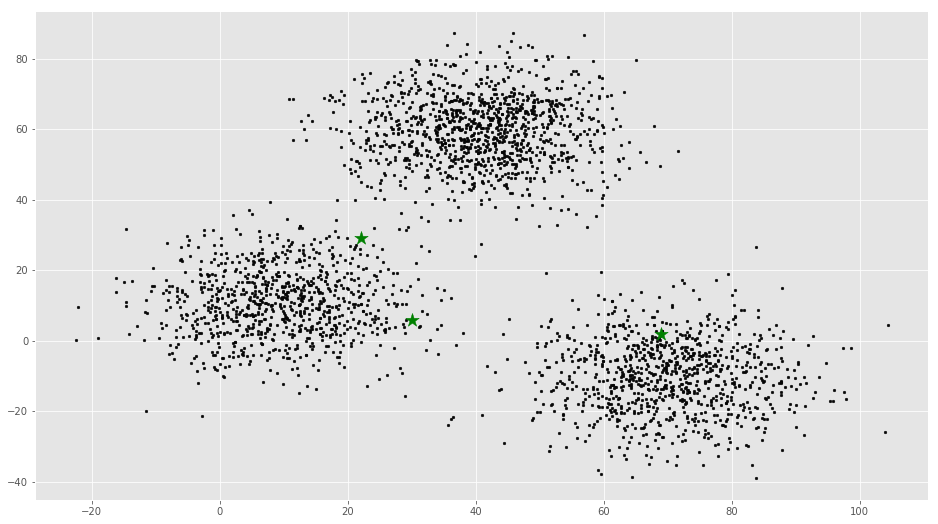

In [17]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

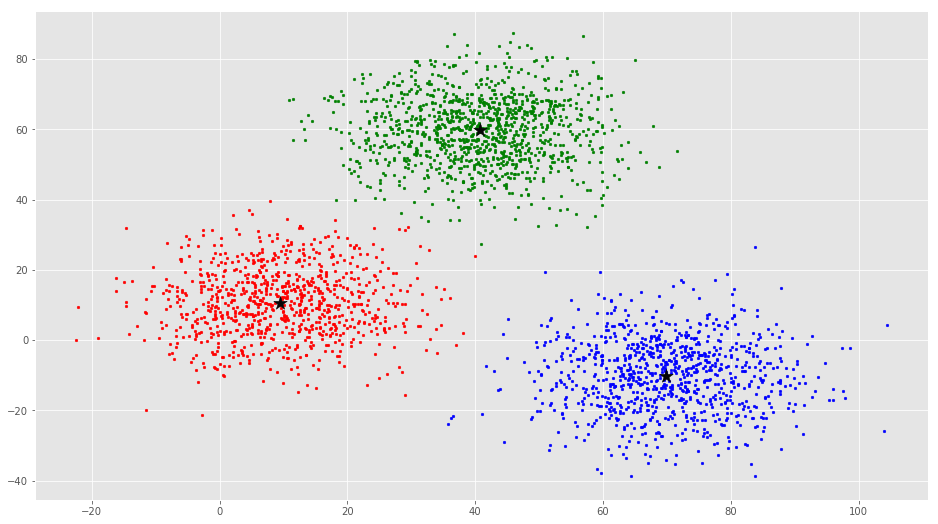

In [19]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')


#### From this visualization it is clear that there are 3 clusters with black stars as their centroid.

If you run K-Means with wrong values of K, you will get completely misleading clusters. For example, if you run K-Means on this with values 2, 4, 5 and 6, you will get the following clusters.

### Okay, so let's try with K=6

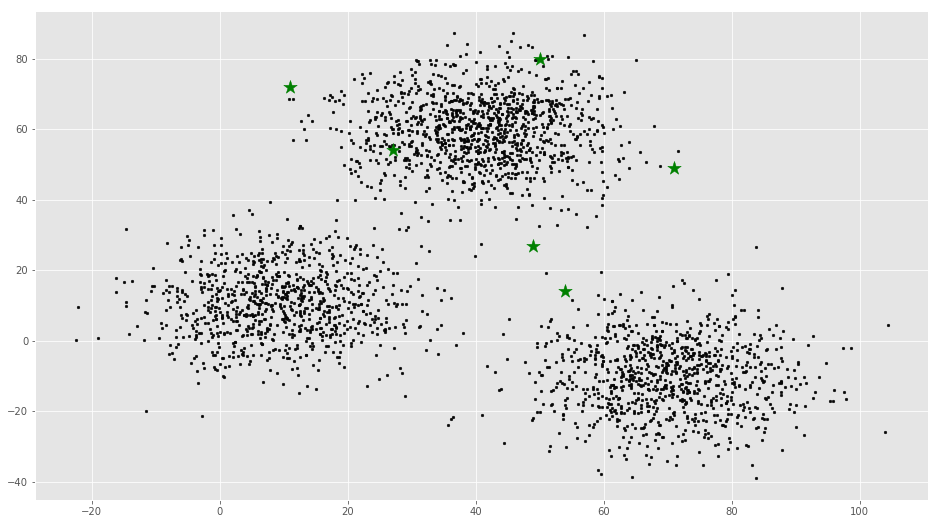

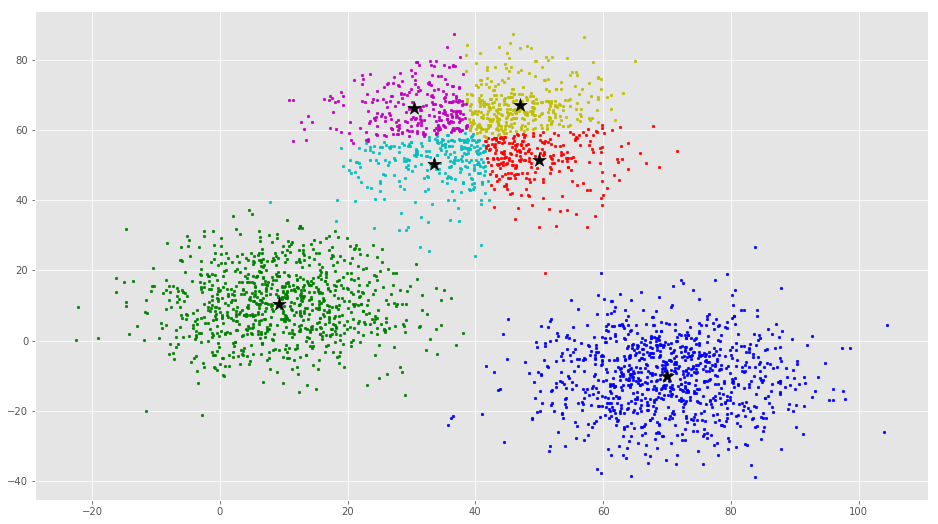

In [26]:
### Number of clusters
k=6
### X coordinates of random centroids (centroids : Pick K random points as cluster centers called centroids.)
C_x = np.random.randint(0,np.max(X)-20,size=k)
### Y coordinates of random centroids 
C_y = np.random.randint(0,np.max(X)-20,size=k)
C = np.array(list(zip(C_x,C_y)),dtype=np.float32)
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')


### Okay, so let's try with K=2

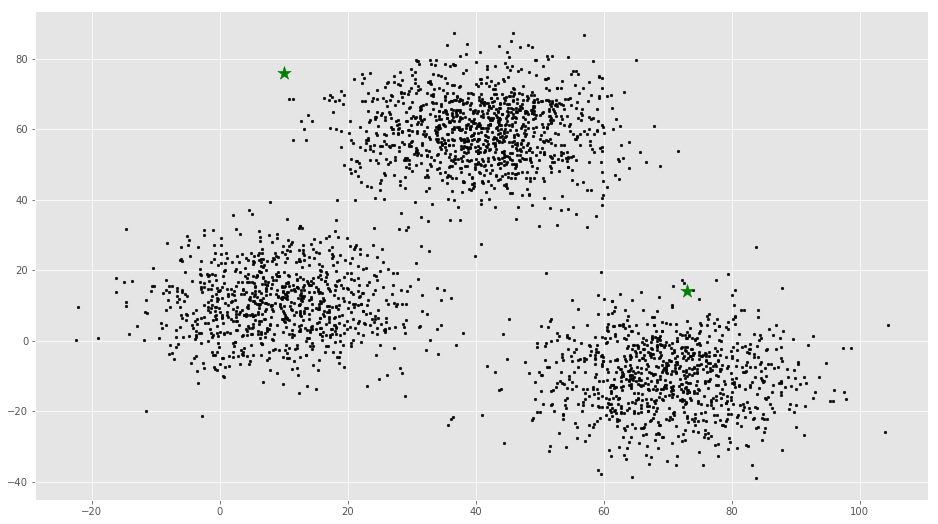

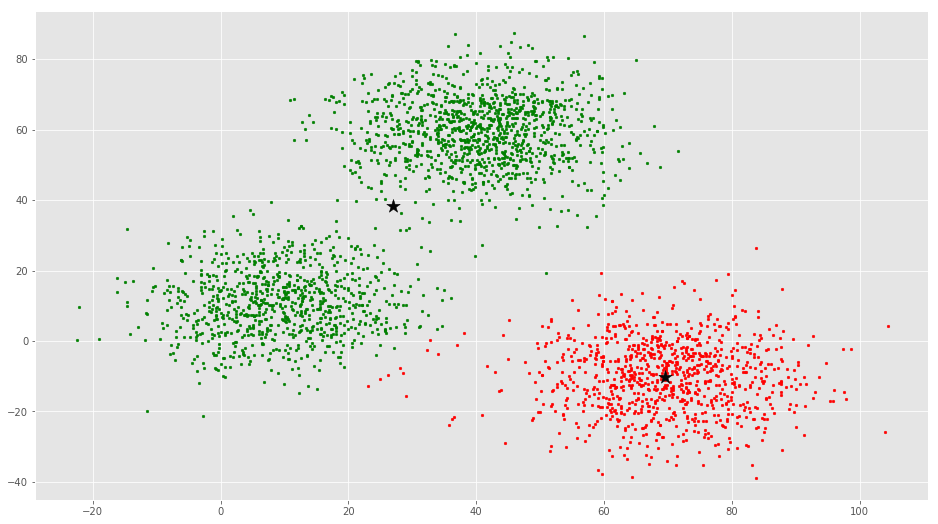

In [27]:
### Number of clusters
k=2
### X coordinates of random centroids (centroids : Pick K random points as cluster centers called centroids.)
C_x = np.random.randint(0,np.max(X)-20,size=k)
### Y coordinates of random centroids 
C_y = np.random.randint(0,np.max(X)-20,size=k)
C = np.array(list(zip(C_x,C_y)),dtype=np.float32)
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')


### Okay, so let's try with K=4

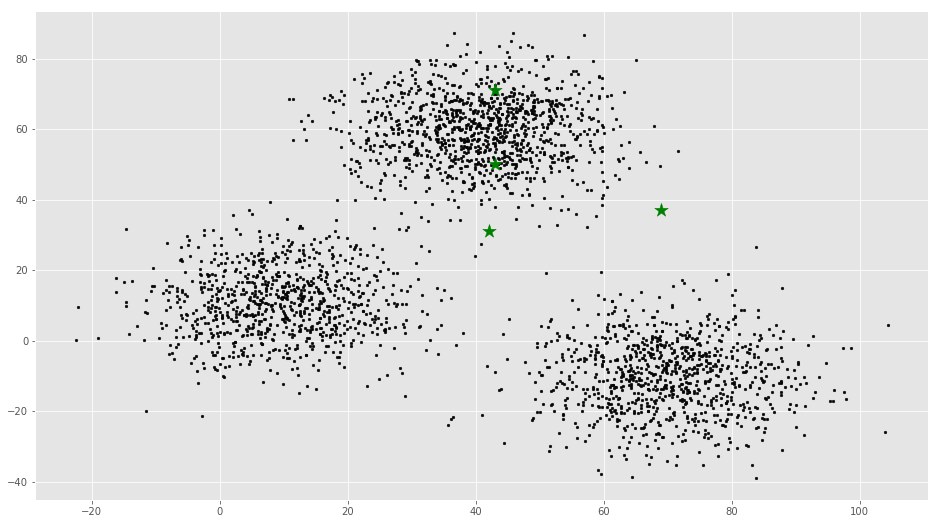

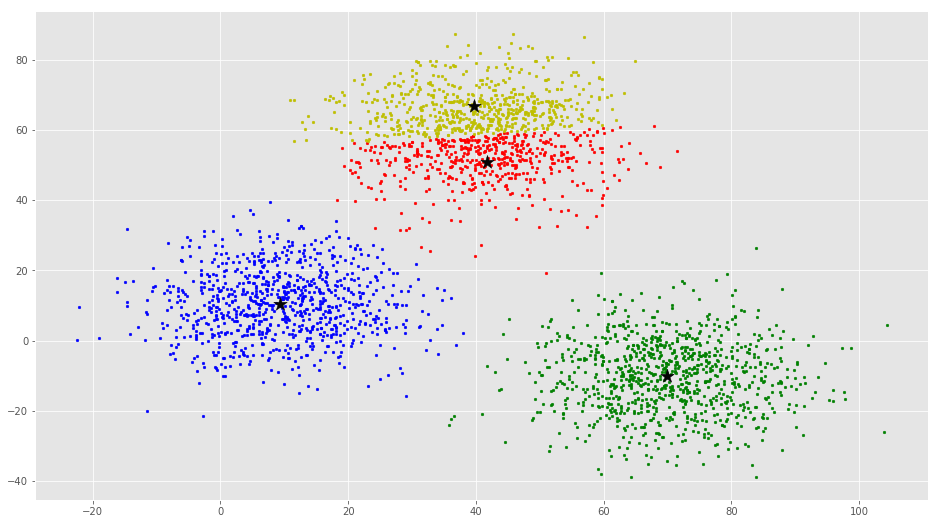

In [29]:
### Number of clusters
k=4
### X coordinates of random centroids (centroids : Pick K random points as cluster centers called centroids.)
C_x = np.random.randint(0,np.max(X)-20,size=k)
### Y coordinates of random centroids 
C_y = np.random.randint(0,np.max(X)-20,size=k)
C = np.array(list(zip(C_x,C_y)),dtype=np.float32)
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
